In [4]:
  #  Import some data manipulation and plotting packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [5]:
aquifer_auser = pd.read_csv("Predictioneer_Dataset.csv")

In [6]:
aquifer_auser.isnull().sum()*100/len(aquifer_auser)

Date                                         0.000000
Rainfall_Gallicano                          63.547455
Rainfall_Pontetetto                         63.547455
Rainfall_Monte_Serra                        63.547455
Rainfall_Orentano                           63.547455
Rainfall_Borgo_a_Mozzano                    63.547455
Rainfall_Piaggione                          71.660369
Rainfall_Calavorno                          63.547455
Rainfall_Croce_Arcana                       63.547455
Rainfall_Tereglio_Coreglia_Antelminelli     63.547455
Rainfall_Fabbriche_di_Vallico               63.547455
Depth_to_Groundwater_LT2                    63.725272
Depth_to_Groundwater_SAL                    77.350522
Depth_to_Groundwater_PAG                    87.908424
Depth_to_Groundwater_CoS                    72.593910
Depth_to_Groundwater_DIEC                  100.000000
Temperature_Orentano                         0.000000
Temperature_Monte_Serra                      0.000000
Temperature_Ponte_a_Moriano 

In [7]:
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,median_absolute_error,mean_squared_error,mean_squared_log_error, r2_score

In [8]:
# split into input and output elements
X = aquifer_auser[['Rainfall_Gallicano', 'Rainfall_Pontetetto',
       'Rainfall_Monte_Serra', 'Rainfall_Orentano', 'Rainfall_Borgo_a_Mozzano',
       'Rainfall_Piaggione', 'Rainfall_Calavorno', 'Rainfall_Croce_Arcana',
       'Rainfall_Tereglio_Coreglia_Antelminelli',
       'Rainfall_Fabbriche_di_Vallico',
       'Temperature_Orentano', 'Temperature_Monte_Serra',
       'Temperature_Ponte_a_Moriano', 'Temperature_Lucca_Orto_Botanico',
       'Volume_POL', 'Volume_CC1', 'Volume_CC2', 'Volume_CSA', 'Volume_CSAL',
       'Hydrometry_Monte_S_Quirico', 'Hydrometry_Piaggione']]
y = aquifer_auser[['Depth_to_Groundwater_LT2',
       'Depth_to_Groundwater_SAL', 'Depth_to_Groundwater_PAG',
       'Depth_to_Groundwater_CoS', 'Depth_to_Groundwater_DIEC']]


k_values = [1,3,5,7,9,15,18,21]
mean_ae_errors = []
median_ae_errors = []
mse_errors = []
rmse_errors = []
rmsle_errors = []
r2_errors = []
results_rf = []
for k in k_values:
    print('k=',k)
    imputer = KNNImputer(n_neighbors=k, metric='nan_euclidean')
    imputer.fit(X)
    Xtrans = imputer.transform(X)
    print('Missing values in independent features: %d' % sum(np.isnan(Xtrans).flatten()))

    imputer.fit(y)
    ytrans = imputer.transform(y)
    print('Missing values in dependent features: %d' % sum(np.isnan(ytrans).flatten()))

    print('*'*10)

    rf = RandomForestRegressor()
    rf.fit(Xtrans, ytrans)

    yhat = rf.predict(Xtrans)

    mean_ae_errors.append(median_absolute_error(ytrans,yhat))
    median_ae_errors.append(median_absolute_error(ytrans,yhat))
    mse_errors.append(mean_squared_error(ytrans,yhat))
    rmse_errors.append(np.sqrt(mean_squared_error(ytrans,yhat)))
    rmsle_errors.append(np.sqrt(mean_squared_log_error(abs(ytrans),abs(yhat))))
    r2_errors.append(r2_score(ytrans,yhat))

k= 1
Missing values in independent features: 0
Missing values in dependent features: 0
**********
k= 3
Missing values in independent features: 0
Missing values in dependent features: 0
**********
k= 5
Missing values in independent features: 0
Missing values in dependent features: 0
**********
k= 7
Missing values in independent features: 0
Missing values in dependent features: 0
**********
k= 9
Missing values in independent features: 0
Missing values in dependent features: 0
**********
k= 15
Missing values in independent features: 0
Missing values in dependent features: 0
**********
k= 18
Missing values in independent features: 0
Missing values in dependent features: 0
**********
k= 21
Missing values in independent features: 0
Missing values in dependent features: 0
**********


Text(0.5, 1.0, 'R2 scores')

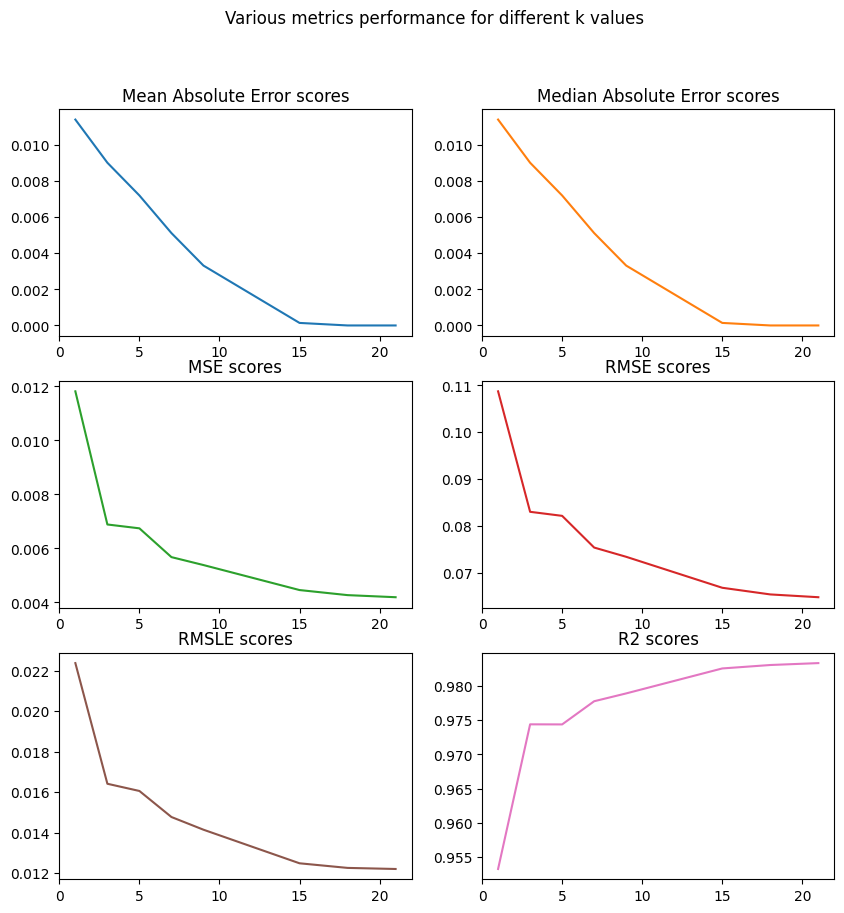

In [9]:
fig, axs = plt.subplots(3, 2,figsize=(10,10))
fig.suptitle('Various metrics performance for different k values')

axs[0, 0].plot(k_values, mean_ae_errors)
axs[0, 0].set_title('Mean Absolute Error scores')
axs[0, 1].plot(k_values, median_ae_errors, 'tab:orange')
axs[0, 1].set_title('Median Absolute Error scores')
axs[1, 0].plot(k_values, mse_errors, 'tab:green')
axs[1, 0].set_title('MSE scores')
axs[1, 1].plot(k_values, rmse_errors, 'tab:red')
axs[1, 1].set_title('RMSE scores')
axs[2, 0].plot(k_values, rmsle_errors, 'tab:brown')
axs[2, 0].set_title('RMSLE scores')
axs[2, 1].plot(k_values, r2_errors, 'tab:pink')
axs[2, 1].set_title('R2 scores')

In [10]:
print(aquifer_auser.columns)


Index(['Date', 'Rainfall_Gallicano', 'Rainfall_Pontetetto',
       'Rainfall_Monte_Serra', 'Rainfall_Orentano', 'Rainfall_Borgo_a_Mozzano',
       'Rainfall_Piaggione', 'Rainfall_Calavorno', 'Rainfall_Croce_Arcana',
       'Rainfall_Tereglio_Coreglia_Antelminelli',
       'Rainfall_Fabbriche_di_Vallico', 'Depth_to_Groundwater_LT2',
       'Depth_to_Groundwater_SAL', 'Depth_to_Groundwater_PAG',
       'Depth_to_Groundwater_CoS', 'Depth_to_Groundwater_DIEC',
       'Temperature_Orentano', 'Temperature_Monte_Serra',
       'Temperature_Ponte_a_Moriano', 'Temperature_Lucca_Orto_Botanico',
       'Volume_POL', 'Volume_CC1', 'Volume_CC2', 'Volume_CSA', 'Volume_CSAL',
       'Hydrometry_Monte_S_Quirico', 'Hydrometry_Piaggione'],
      dtype='object')


In [11]:
#Using only the rows with non-null target values i.e. Depth to groundwater features
aquifer_auser_filtered = aquifer_auser[aquifer_auser[['Depth_to_Groundwater_LT2',
       'Depth_to_Groundwater_SAL', 'Depth_to_Groundwater_PAG',
       'Depth_to_Groundwater_CoS']].notna().all(axis=1)]

# split into input and output elements
X = aquifer_auser_filtered[['Rainfall_Gallicano', 'Rainfall_Pontetetto',
       'Rainfall_Monte_Serra', 'Rainfall_Orentano', 'Rainfall_Borgo_a_Mozzano',
       'Rainfall_Piaggione', 'Rainfall_Calavorno', 'Rainfall_Croce_Arcana',
       'Rainfall_Tereglio_Coreglia_Antelminelli',
       'Rainfall_Fabbriche_di_Vallico',
       'Temperature_Orentano', 'Temperature_Monte_Serra',
       'Temperature_Ponte_a_Moriano', 'Temperature_Lucca_Orto_Botanico',
       'Volume_POL', 'Volume_CC1', 'Volume_CC2', 'Volume_CSA', 'Volume_CSAL',
       'Hydrometry_Monte_S_Quirico', 'Hydrometry_Piaggione']]
y = aquifer_auser_filtered[['Depth_to_Groundwater_LT2',
       'Depth_to_Groundwater_SAL', 'Depth_to_Groundwater_PAG',
       'Depth_to_Groundwater_CoS']]


k_values = [1,3,5,7,9,15,18,21]
results_rf_rmsle = []
results_dt_rmsle = []
results_lr_rmsle = []
results_knn_rmsle = []
results_rf_mae = []
results_dt_mae = []
results_lr_mae = []
results_knn_mae = []
results_rf_r2 = []
results_dt_r2 = []
results_lr_r2 = []
results_knn_r2 = []
for k in k_values:
    imputer = KNNImputer(n_neighbors=k, metric='nan_euclidean')
    imputer.fit(X)
    Xtrans = imputer.transform(X)

    X = Xtrans

    rf = RandomForestRegressor()
    rf.fit(X, y)

    yhat = rf.predict(X)

    scores_rf_rmsle = np.sqrt(mean_squared_log_error(abs(y),abs(yhat)))
    scores_rf_mae = median_absolute_error(y,yhat)
    scores_rf_r2 = r2_score(y,yhat)

    dt = DecisionTreeRegressor()

    dt.fit(X, y)

    yhat = dt.predict(X)

    scores_dt_rmsle = np.sqrt(mean_squared_log_error(abs(y),abs(yhat)))
    scores_dt_mae = median_absolute_error(y,yhat)
    scores_dt_r2 = r2_score(y,yhat)

    lr = LinearRegression()
    lr.fit(X, y)

    yhat = lr.predict(X)

    scores_lr_rmsle = np.sqrt(mean_squared_log_error(abs(y),abs(yhat)))
    scores_lr_mae = median_absolute_error(y,yhat)
    scores_lr_r2 = r2_score(y,yhat)

    knn_reg = KNeighborsRegressor()
    knn_reg.fit(X, y)

    yhat = knn_reg.predict(X)

    scores_knn_rmsle = np.sqrt(mean_squared_log_error(abs(y),abs(yhat)))
    scores_knn_mae = median_absolute_error(y,yhat)
    scores_knn_r2 = r2_score(y,yhat)

    # store results
    results_rf_rmsle.append(scores_rf_rmsle)
    results_dt_rmsle.append(scores_dt_rmsle)
    results_lr_rmsle.append(scores_lr_rmsle)
    results_knn_rmsle.append(scores_knn_rmsle)

    results_rf_mae.append(scores_rf_mae)
    results_dt_mae.append(scores_dt_mae)
    results_lr_mae.append(scores_lr_mae)
    results_knn_mae.append(scores_knn_mae)

    results_rf_r2.append(scores_rf_r2)
    results_dt_r2.append(scores_dt_r2)
    results_lr_r2.append(scores_lr_r2)
    results_knn_r2.append(scores_knn_r2)

Text(0.5, 1.0, 'KNN scores')

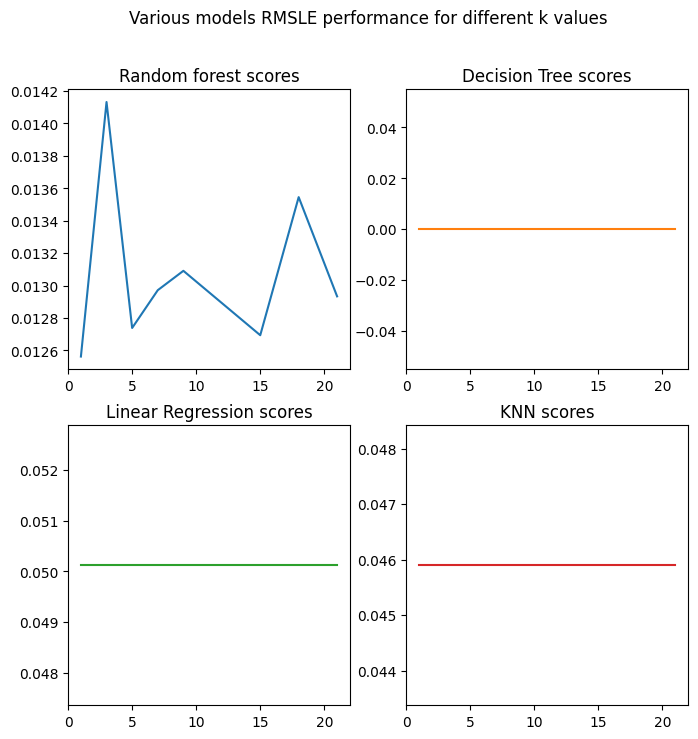

In [12]:
fig, axs = plt.subplots(2, 2,figsize=(8,8))
fig.suptitle('Various models RMSLE performance for different k values')

axs[0, 0].plot(k_values, results_rf_rmsle)
axs[0, 0].set_title('Random forest scores')
axs[0, 1].plot(k_values, results_dt_rmsle, 'tab:orange')
axs[0, 1].set_title('Decision Tree scores')
axs[1, 0].plot(k_values, results_lr_rmsle, 'tab:green')
axs[1, 0].set_title('Linear Regression scores')
axs[1, 1].plot(k_values, results_knn_rmsle, 'tab:red')
axs[1, 1].set_title('KNN scores')

Text(0.5, 1.0, 'KNN scores')

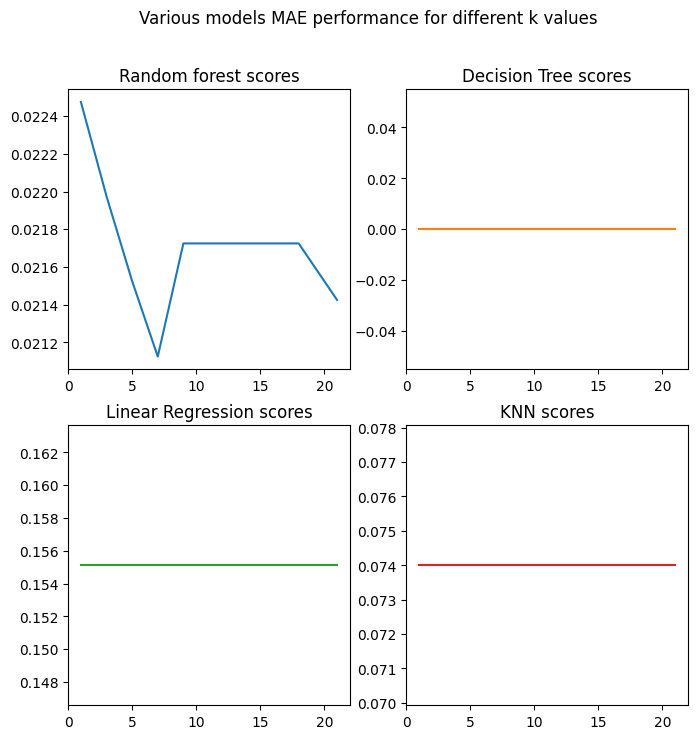

In [13]:
fig, axs = plt.subplots(2, 2,figsize=(8,8))
fig.suptitle('Various models MAE performance for different k values')

axs[0, 0].plot(k_values, results_rf_mae)
axs[0, 0].set_title('Random forest scores')
axs[0, 1].plot(k_values, results_dt_mae, 'tab:orange')
axs[0, 1].set_title('Decision Tree scores')
axs[1, 0].plot(k_values, results_lr_mae, 'tab:green')
axs[1, 0].set_title('Linear Regression scores')
axs[1, 1].plot(k_values, results_knn_mae, 'tab:red')
axs[1, 1].set_title('KNN scores')

Text(0.5, 1.0, 'KNN scores')

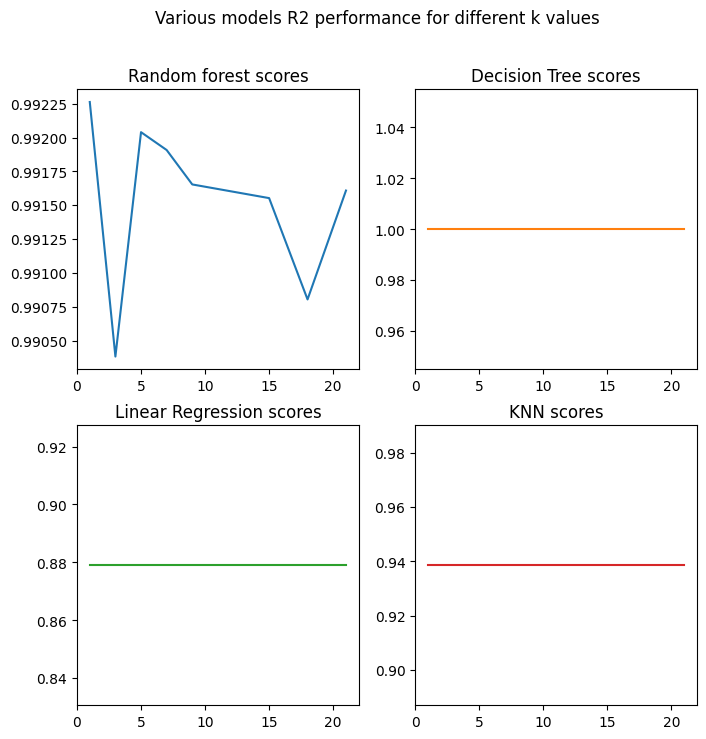

In [14]:
fig, axs = plt.subplots(2, 2,figsize=(8,8))
fig.suptitle('Various models R2 performance for different k values')

axs[0, 0].plot(k_values, results_rf_r2)
axs[0, 0].set_title('Random forest scores')
axs[0, 1].plot(k_values, results_dt_r2, 'tab:orange')
axs[0, 1].set_title('Decision Tree scores')
axs[1, 0].plot(k_values, results_lr_r2, 'tab:green')
axs[1, 0].set_title('Linear Regression scores')
axs[1, 1].plot(k_values, results_knn_r2, 'tab:red')
axs[1, 1].set_title('KNN scores')

In [15]:
X = aquifer_auser[['Rainfall_Gallicano', 'Rainfall_Pontetetto',
       'Rainfall_Monte_Serra', 'Rainfall_Orentano', 'Rainfall_Borgo_a_Mozzano',
       'Rainfall_Piaggione', 'Rainfall_Calavorno', 'Rainfall_Croce_Arcana',
       'Rainfall_Tereglio_Coreglia_Antelminelli',
       'Rainfall_Fabbriche_di_Vallico',
       'Temperature_Orentano', 'Temperature_Monte_Serra',
       'Temperature_Ponte_a_Moriano', 'Temperature_Lucca_Orto_Botanico',
       'Volume_POL', 'Volume_CC1', 'Volume_CC2', 'Volume_CSA', 'Volume_CSAL',
       'Hydrometry_Monte_S_Quirico']]
#Hydrometry_Piaggione dropped
imputer = KNNImputer(n_neighbors=18, metric='nan_euclidean')
imputer.fit(X)
Xtrans = imputer.transform(X)
X = Xtrans


#Using only the rows with non-null target values i.e. Depth to groundwater featutres
aquifer_auser_filtered = aquifer_auser[aquifer_auser[['Depth_to_Groundwater_LT2',
       'Depth_to_Groundwater_SAL', 'Depth_to_Groundwater_PAG',
       'Depth_to_Groundwater_CoS']].notna().all(axis=1)]
#Depth_to_Groundwater_DIEC dropped

# split into input and output elements
non_null_depth_X = aquifer_auser_filtered[['Rainfall_Gallicano', 'Rainfall_Pontetetto',
       'Rainfall_Monte_Serra', 'Rainfall_Orentano', 'Rainfall_Borgo_a_Mozzano',
       'Rainfall_Piaggione', 'Rainfall_Calavorno', 'Rainfall_Croce_Arcana',
       'Rainfall_Tereglio_Coreglia_Antelminelli',
       'Rainfall_Fabbriche_di_Vallico',
       'Temperature_Orentano', 'Temperature_Monte_Serra',
       'Temperature_Ponte_a_Moriano', 'Temperature_Lucca_Orto_Botanico',
       'Volume_POL', 'Volume_CC1', 'Volume_CC2', 'Volume_CSA', 'Volume_CSAL',
       'Hydrometry_Monte_S_Quirico']]
non_null_depth_y = aquifer_auser_filtered[['Depth_to_Groundwater_LT2',
       'Depth_to_Groundwater_SAL', 'Depth_to_Groundwater_PAG',
       'Depth_to_Groundwater_CoS']]

imputer = KNNImputer(n_neighbors=18, metric='nan_euclidean')
imputer.fit(non_null_depth_X)
non_null_depth_X = imputer.transform(non_null_depth_X)

rf = RandomForestRegressor()
rf.fit(non_null_depth_X, non_null_depth_y)

predicted_target_values = rf.predict(X)
predicted_target_values.shape

(4499, 4)

In [16]:
# Final preprocessed Aquifer Auser dataset

aquifer_auser_filled = pd.DataFrame(X,columns=['Rainfall_Gallicano', 'Rainfall_Pontetetto',
       'Rainfall_Monte_Serra', 'Rainfall_Orentano', 'Rainfall_Borgo_a_Mozzano',
       'Rainfall_Piaggione', 'Rainfall_Calavorno', 'Rainfall_Croce_Arcana',
       'Rainfall_Tereglio_Coreglia_Antelminelli',
       'Rainfall_Fabbriche_di_Vallico',
       'Temperature_Orentano', 'Temperature_Monte_Serra',
       'Temperature_Ponte_a_Moriano', 'Temperature_Lucca_Orto_Botanico',
       'Volume_POL', 'Volume_CC1', 'Volume_CC2', 'Volume_CSA', 'Volume_CSAL',
       'Hydrometry_Monte_S_Quirico'])
#Hydrometry_Piaggione dropped
aquifer_auser_filled['Date'] = aquifer_auser['Date']
aquifer_auser_filled['Depth_to_Groundwater_LT2'] = predicted_target_values[:,0]
aquifer_auser_filled['Depth_to_Groundwater_SAL'] = predicted_target_values[:,1]
aquifer_auser_filled['Depth_to_Groundwater_PAG'] = predicted_target_values[:,2]
aquifer_auser_filled['Depth_to_Groundwater_CoS'] = predicted_target_values[:,3]



In [17]:
aquifer_auser_filled.head()


,Rainfall_Gallicano,Rainfall_Pontetetto,Rainfall_Monte_Serra,Rainfall_Orentano,Rainfall_Borgo_a_Mozzano,Rainfall_Piaggione,Rainfall_Calavorno,Rainfall_Croce_Arcana,Rainfall_Tereglio_Coreglia_Antelminelli,Rainfall_Fabbriche_di_Vallico,...,Volume_CC1,Volume_CC2,Volume_CSA,Volume_CSAL,Hydrometry_Monte_S_Quirico,Date,Depth_to_Groundwater_LT2,Depth_to_Groundwater_SAL,Depth_to_Groundwater_PAG,Depth_to_Groundwater_CoS
0,0.033333,0.177778,0.255556,0.211111,0.144444,0.033333,0.055556,1.022222,0.477778,0.000000,...,-17807.371416,-13168.811593,0.0,0.0,0.319444,3/5/1998,-14.4739,-6.0334,-2.0287,-7.2759
1,3.677778,4.288889,5.666667,3.188889,3.877778,4.211111,3.911111,0.466667,2.766667,6.244444,...,-16347.003116,-12465.255859,0.0,0.0,0.282222,3/6/1998,-14.4875,-6.0957,-2.0381,-7.5992
2,3.188889,4.555556,2.788889,4.000000,3.700000,4.211111,3.688889,1.222222,1.522222,5.377778,...,-14940.093727,-12066.916500,0.0,0.0,0.215000,3/7/1998,-14.4766,-6.0276,-2.0961,-7.4146
3,1.744444,2.344444,2.800000,2.288889,1.744444,2.955556,1.733333,0.911111,1.511111,3.066667,...,-14977.916380,-11972.390462,0.0,0.0,0.223333,3/8/1998,-14.5216,-6.0005,-2.0838,-7.2527
4,1.755556,2.355556,2.800000,2.300000,1.744444,3.711111,1.744444,0.911111,1.511111,3.077778,...,-14986.495161,-12035.133171,0.0,0.0,0.230556,3/9/1998,-14.5203,-6.0059,-2.0898,-7.2849


In [18]:
aquifer_auser_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4499 entries, 0 to 4498
Data columns (total 25 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Rainfall_Gallicano                       4499 non-null   float64
 1   Rainfall_Pontetetto                      4499 non-null   float64
 2   Rainfall_Monte_Serra                     4499 non-null   float64
 3   Rainfall_Orentano                        4499 non-null   float64
 4   Rainfall_Borgo_a_Mozzano                 4499 non-null   float64
 5   Rainfall_Piaggione                       4499 non-null   float64
 6   Rainfall_Calavorno                       4499 non-null   float64
 7   Rainfall_Croce_Arcana                    4499 non-null   float64
 8   Rainfall_Tereglio_Coreglia_Antelminelli  4499 non-null   float64
 9   Rainfall_Fabbriche_di_Vallico            4499 non-null   float64
 10  Temperature_Orentano                     4499 no

In [1]:
aquifer_auser_filled.to_csv('aquifer_auser_preprocessed.csv',index=False)

NameError: name 'aquifer_auser_filled' is not defined

In [20]:
aquifer_auser_filled.head()

,Rainfall_Gallicano,Rainfall_Pontetetto,Rainfall_Monte_Serra,Rainfall_Orentano,Rainfall_Borgo_a_Mozzano,Rainfall_Piaggione,Rainfall_Calavorno,Rainfall_Croce_Arcana,Rainfall_Tereglio_Coreglia_Antelminelli,Rainfall_Fabbriche_di_Vallico,...,Volume_CC1,Volume_CC2,Volume_CSA,Volume_CSAL,Hydrometry_Monte_S_Quirico,Date,Depth_to_Groundwater_LT2,Depth_to_Groundwater_SAL,Depth_to_Groundwater_PAG,Depth_to_Groundwater_CoS
0,0.033333,0.177778,0.255556,0.211111,0.144444,0.033333,0.055556,1.022222,0.477778,0.000000,...,-17807.371416,-13168.811593,0.0,0.0,0.319444,3/5/1998,-14.4739,-6.0334,-2.0287,-7.2759
1,3.677778,4.288889,5.666667,3.188889,3.877778,4.211111,3.911111,0.466667,2.766667,6.244444,...,-16347.003116,-12465.255859,0.0,0.0,0.282222,3/6/1998,-14.4875,-6.0957,-2.0381,-7.5992
2,3.188889,4.555556,2.788889,4.000000,3.700000,4.211111,3.688889,1.222222,1.522222,5.377778,...,-14940.093727,-12066.916500,0.0,0.0,0.215000,3/7/1998,-14.4766,-6.0276,-2.0961,-7.4146
3,1.744444,2.344444,2.800000,2.288889,1.744444,2.955556,1.733333,0.911111,1.511111,3.066667,...,-14977.916380,-11972.390462,0.0,0.0,0.223333,3/8/1998,-14.5216,-6.0005,-2.0838,-7.2527
4,1.755556,2.355556,2.800000,2.300000,1.744444,3.711111,1.744444,0.911111,1.511111,3.077778,...,-14986.495161,-12035.133171,0.0,0.0,0.230556,3/9/1998,-14.5203,-6.0059,-2.0898,-7.2849
